In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch


from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP
from micrograd.onehot import arr2vals, oh_encode, VOID
from micrograd.eval import calc_sq_loss, calc_accuracy, evaluate
from micrograd.visualize import draw_dot

%matplotlib inline

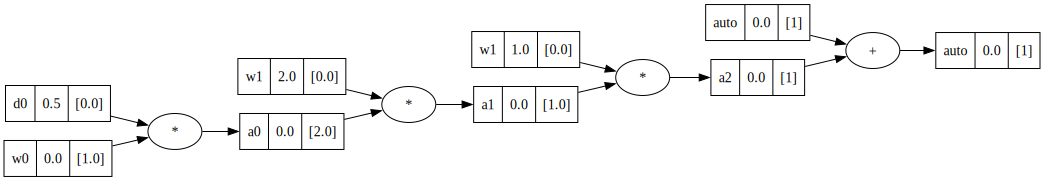

In [2]:
w0 = Value(0.0, _name='w0')

d0 = Value(0.5, _name='d0')
a0 = (w0*d0).sbin()
a0._name = 'a0'

w1 = Value(2.0, _name='w1')
a1 = (a0*w1).sbin()
a1._name = 'a1'

w2 = Value(1.0, _name='w1')
a2 = (a1*w2).sbin()
a2._name = 'a2'

L = (a2 + 0)
L.backward()
draw_dot(L)


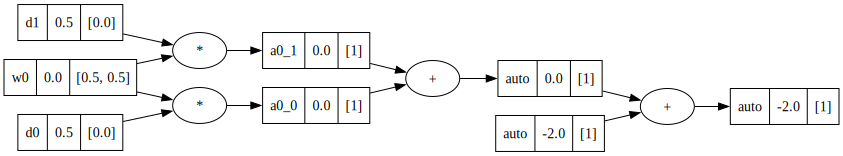

In [3]:
w0 = Value(0.0, _name='w0')
d0 = Value(0.5, _name='d0')
d1 = Value(0.5, _name='d1')

a0_0 = (w0*d0).sbin()
a0_0._name = 'a0_0'

a0_1 = (w0*d1).sbin()
a0_1._name = 'a0_1'

L = (a0_0.abs() + a0_1.abs() - 2)
L.backward()
draw_dot(L)

In [2]:
np.random.seed(1337)
random.seed(1337)

CLASSES = [0, 1]
oh_encoder, oh_decoder = oh_encode(CLASSES)

TRAINING_SAMPLE = [
    [[0.5, 0.5], 0],
    [[0.5, 1.0], 1]
]
X, Y = zip(*TRAINING_SAMPLE)

X = torch.tensor(X)
Y_oh = oh_encoder(torch.tensor(Y))

model = MLP(
    [
        Layer(
            [X.shape[1], Y_oh.shape[1]],
            'sbin',
            _lid=0
        )
    ],
    train=True
)


X = arr2vals(X, 'input')
Y_oh = arr2vals(Y_oh, 'target')

print('inputs: ', X)
print('targets: ', Y_oh, '\n')

inputs:  [[Value(input:0:0 : [0.5, 0.0, 1.0]), Value(input:0:1 : [0.5, 0.0, 1.0])], [Value(input:1:0 : [0.5, 0.0, 1.0]), Value(input:1:1 : [1.0, 0.0, 1.0])]]
targets:  [[Value(target:0:0 : [1.0, 0.0, 1.0]), Value(target:0:1 : [-1.0, 0.0, 1.0])], [Value(target:1:0 : [-1.0, 0.0, 1.0]), Value(target:1:1 : [1.0, 0.0, 1.0])]] 



In [3]:
import functools

get_loss = functools.partial(calc_sq_loss, targets=Y_oh)
learner, scores, total_loss = model.make_learner(X, get_loss)


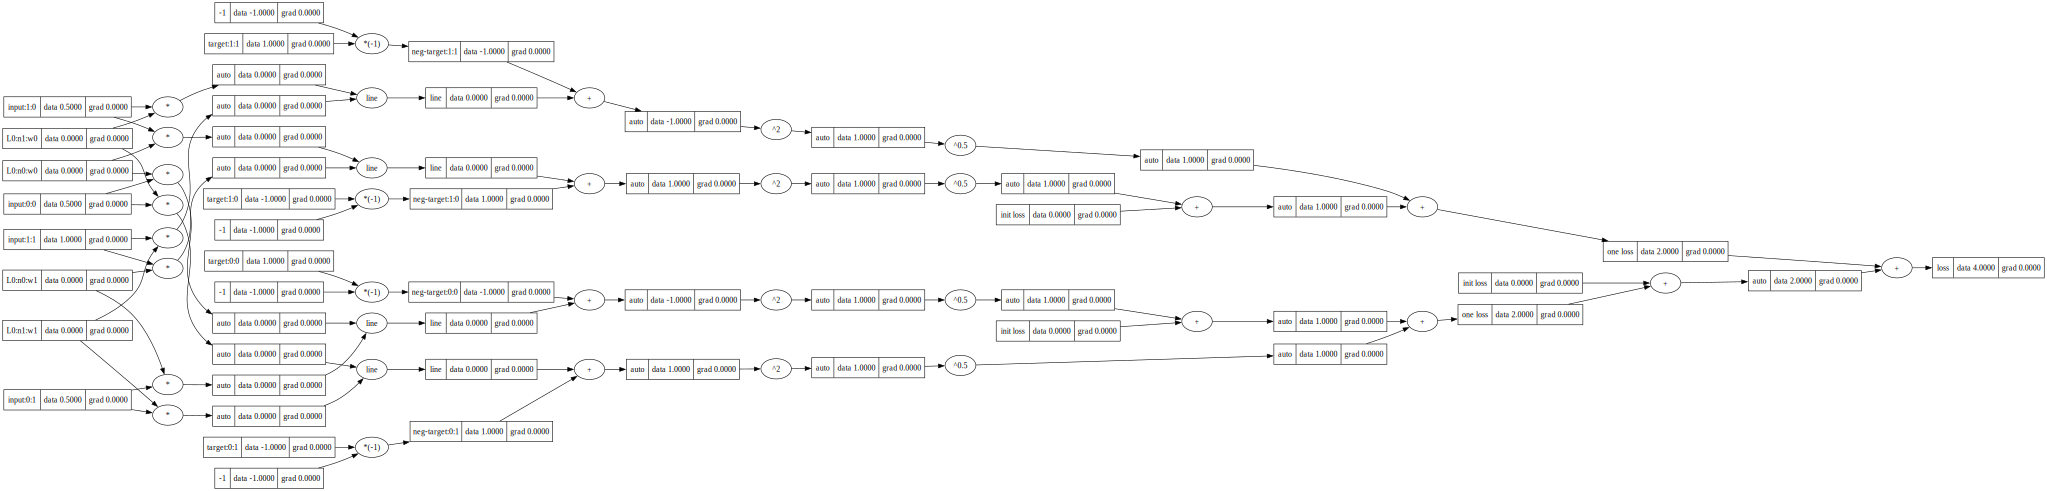

In [4]:
draw_dot(total_loss)

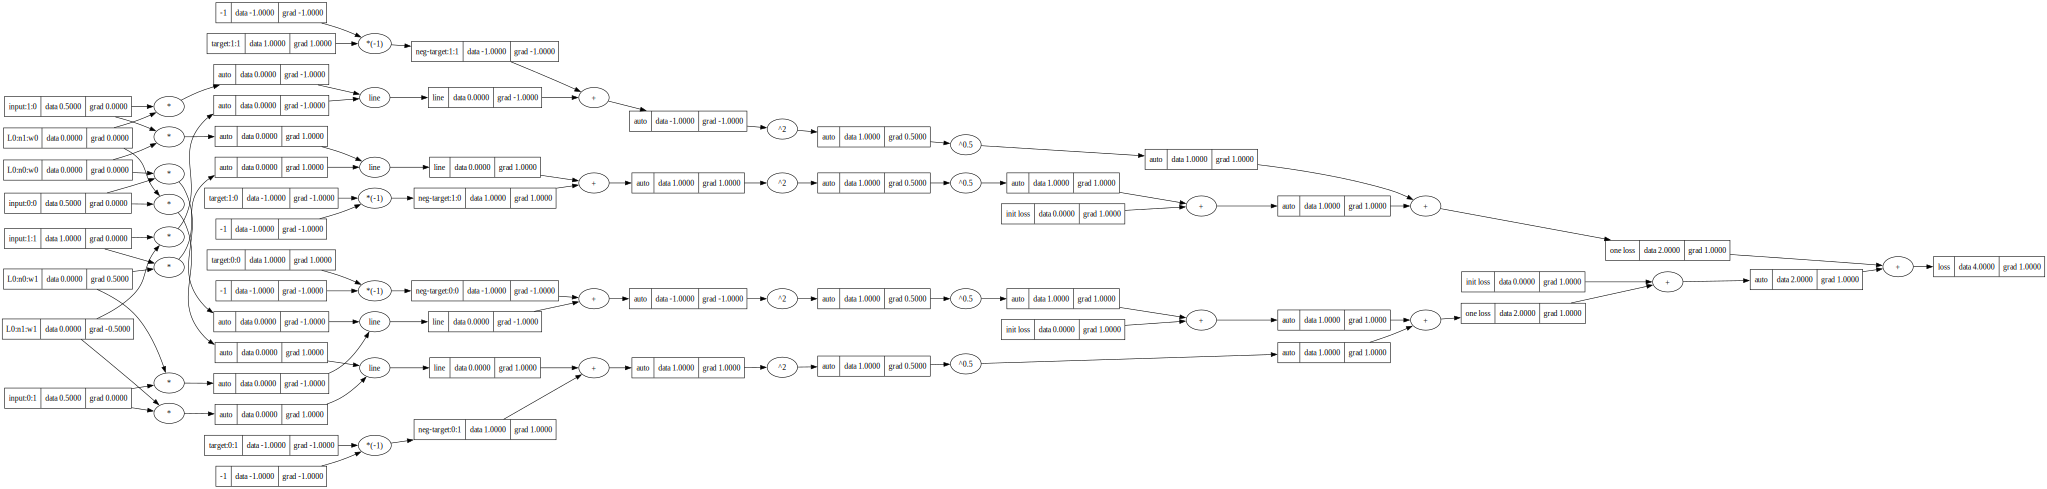

In [5]:
total_loss.backward()
draw_dot(total_loss)

In [6]:
total_loss, scores = learner(i=1, q=1.0)
total_loss, scores

0 loss: 4.0
final loss: 4.0


(Value(loss : [4.0, 0.0, 1.0]),
 [(Value(sbin : [-1.0, 0.0, 1.0]), Value(sbin : [1.0, 0.0, 1.0])),
  (Value(sbin : [-1.0, 0.0, 1.0]), Value(sbin : [1.0, 0.0, 1.0]))])

0 loss: 4.0
1 loss: 4.0
2 loss: 4.0
3 loss: 4.0
4 loss: 4.0
5 loss: 4.0
EARLY STOP BY ESAT=0.0!
final loss: 0.0
scores:  [(Value(sbin : [1.0, 0.0, 1.0]), Value(sbin : [-1.0, 0.0, 1.0])), (Value(sbin : [-1.0, 0.0, 1.0]), Value(sbin : [1.0, 0.0, 1.0]))]
accuracy:  1.0


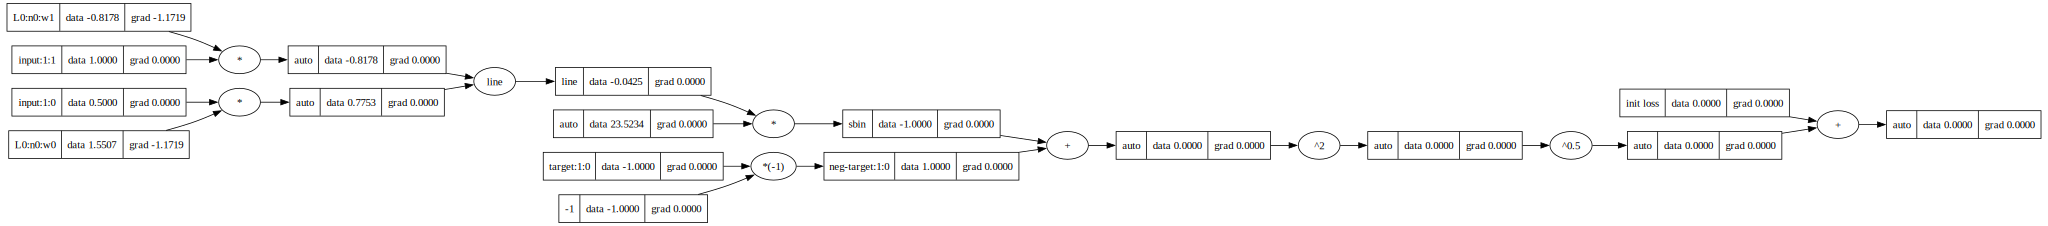

In [7]:
total_loss, scores = learner(i=10, q=0.5)
acc = calc_accuracy(scores, Y_oh, oh_decoder)
print('scores: ', scores)
print('accuracy: ', acc)
draw_dot(total_loss.child(1).child(0))